# The Fibonacci Sequence in the Stock Market

### The Fibonacci Sequence can be found all throughout nature. Surprisingly, there are interesting examples of this mathematical phenominon in the stock market.

### If we took the first few terms of the Fibonacci sequence... 0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181... and then took the first number of each term (ex: for 1597 we would take the number 1, then for 2584 we would take the number 2 and so on) we would find that the frequency of the numbers are not what we would expect. 

### The frequency of each number is not the same. Instead, the number 1 appears almost 30 percent of the time, and drops significantly as you get to the number 9, falling to just a few percent. This phenomenon is what we hope to observe in stock market data.

### For this to work, we need to take data from a stock that has gone through growth over a couple orders of magnitude - I chose the BlackRock stock for this example. This should give us enough data to observe the Fibonacci Sequence. 

### Let's dive in!

In [1]:
#import python libraries
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import pandas as pd

In [2]:
#Grab BlackRock Stock data
blk = yf.Ticker('BLK')
blk_hist = blk.history(period = 'max')
blk_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1999-10-01,9.136385,9.299535,9.136385,9.217960,3162400,0.0,0
1999-10-04,9.217963,9.217963,9.136388,9.136388,533400,0.0,0
1999-10-05,9.136385,9.217960,9.136385,9.217960,270600,0.0,0
1999-10-06,9.217962,9.707411,9.217962,9.707411,205400,0.0,0
1999-10-07,9.707410,9.707410,9.177173,9.217960,214200,0.0,0


In [3]:
#Get the first number of each closing price (as discussed above).

close_price = blk_hist.Close
close_price_str = close_price.astype(str)

def first_number(sequence):
    first_int = [sequence[i][0] for i in range(len(sequence))]
    return first_int

first_int = first_number(close_price_str)

In [4]:
#Determine the frequency of each first integer.

def freq(first_ints):
    counts = {}

    for item in first_ints:
        if item in counts:
            counts[item] += 1
        else:
            counts[item] = 1
    
    ratios = list(counts.values()) / np.sum(list(counts.values()))

    return counts, ratios

In [8]:
#Print results
counts, ratios = freq(first_int)[0] , freq(first_int)[1]
counts, ratios

({'9': 242,
  '8': 238,
  '1': 1664,
  '2': 1439,
  '3': 794,
  '4': 645,
  '5': 370,
  '6': 161,
  '7': 173},
 array([0.04226336, 0.04156479, 0.29060426, 0.25130981, 0.13866574,
        0.11264408, 0.06461753, 0.02811736, 0.03021306]))

In [98]:
#Combine results into a dataframe

def readable_df(counts , ratios, *col_names):
    stock_df = pd.concat([ pd.Series(counts.keys()) , pd.Series(counts.values()) , pd.Series(ratios) ] , axis = 1)
    stock_df.columns = list(col_names)
    stock_df = stock_df.sort_values(col_names[0]).reset_index(drop = True)
    return stock_df


blk_df = readable_df(counts, ratios, 'Ints' , 'Counts' ,'Stock_Freq')
blk_df

,Ints,Counts,Stock_Freq
0,1,1664,0.290604
1,2,1439,0.251310
2,3,794,0.138666
3,4,645,0.112644
4,5,370,0.064618
5,6,161,0.028117
6,7,173,0.030213
7,8,238,0.041565
8,9,242,0.042263


### Now that we have the results of the stock data, let's take a moment to look at the results. We can see that the number 1 appears almost 30% of the time, 2 appears 25% and then it begins to drop rapidly until reaching a few percent after 5. 

### Let's look at the actual Fibanacci Sequence now.

In [75]:
#Get the first 500 Fibonacci Numbers

def fib(n, computed = {0: 0, 1: 1}):
    if n not in computed:
        computed[n] = fib(n-1, computed) + fib(n-2, computed)
    return computed[n]


nums = np.linspace(1,500,500)

fib_nums = list(map(fib , nums))

In [79]:
#Use the functions above to perform the same analysis on the Fibonacci Sequence numbers.

#convert numbers in sequence to strings
fib_nums = [str(i) for i in fib_nums]

# grab first number from each num
first_fib_nums = first_number(fib_nums)

#calculate frequncy of nums
freq_fib_nums = freq(first_fib_nums)

fib_counts, fib_ratios = freq_fib_nums[0] , freq_fib_nums[1]
fib_counts, fib_ratios

({'1': 151,
  '2': 88,
  '3': 63,
  '5': 40,
  '8': 27,
  '6': 33,
  '9': 22,
  '4': 47,
  '7': 29},
 array([0.302, 0.176, 0.126, 0.08 , 0.054, 0.066, 0.044, 0.094, 0.058]))

In [99]:
#create a readable dataframe for the Fib sequence
fib_df = readable_df(fib_counts, fib_ratios , 'fib_ints' , 'fib_counts' , 'fib_ratios')
fib_df

,fib_ints,fib_counts,fib_ratios
0,1,151,0.302
1,2,88,0.176
2,3,63,0.126
3,4,47,0.094
4,5,40,0.080
5,6,33,0.066
6,7,29,0.058
7,8,27,0.054
8,9,22,0.044


### Now we have all the data we need to visualize how closely BlackRock stock follows the Fibonacci Sequence.

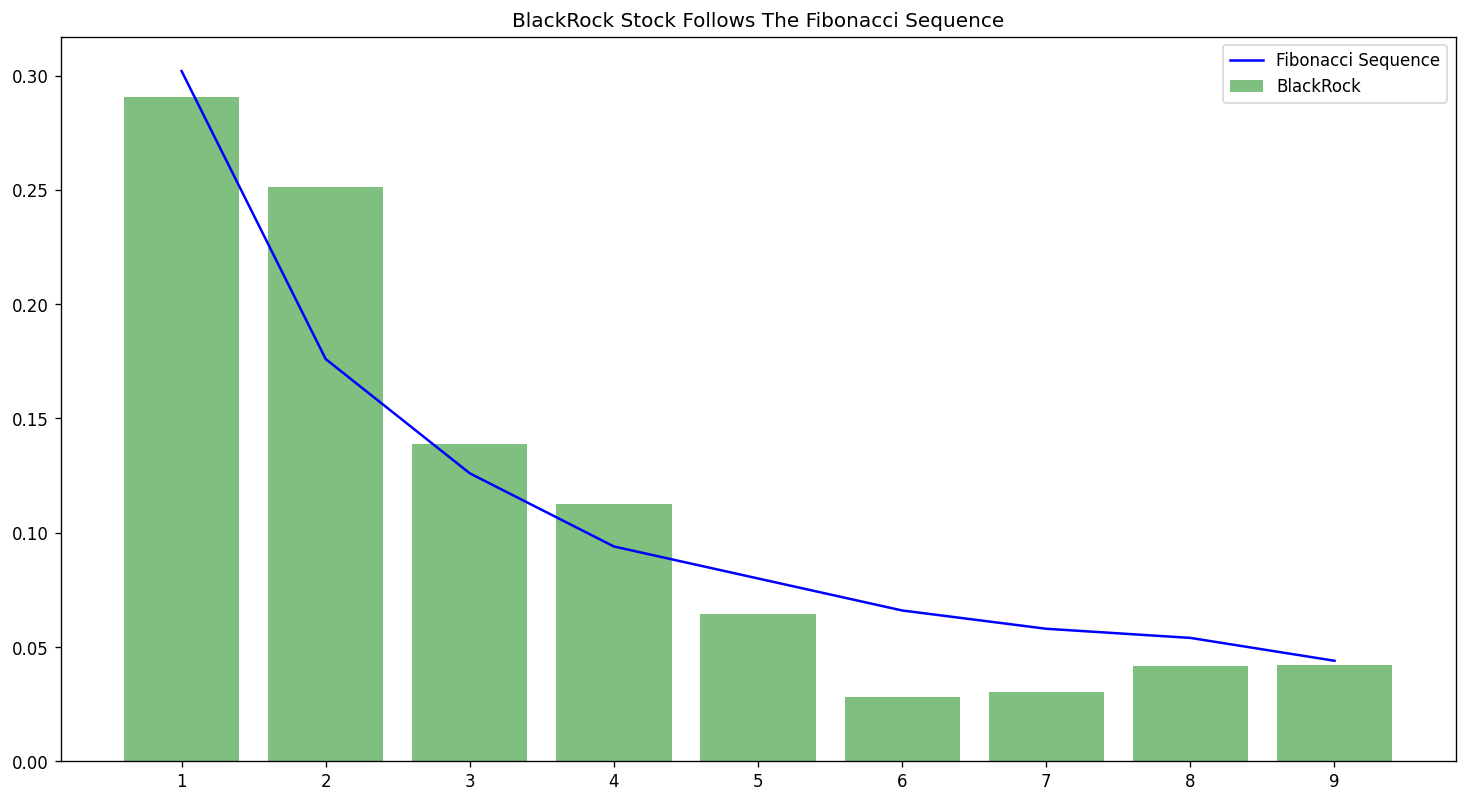

In [100]:
plt_1 = plt.figure(figsize=(15,8), dpi = 120)
plt.bar(blk_df.iloc[:,0] , blk_df.iloc[:,2] , label = 'BlackRock' ,
        alpha = 0.5, color = 'g')
plt.plot(fib_df.iloc[:,0] , fib_df.iloc[:,2] , label = 'Fibonacci Sequence' ,
         color = 'b')


plt.title('BlackRock Stock Follows The Fibonacci Sequence')
plt.legend()
plt.savefig(r'C:\Users\John Green\Desktop\BlackRockAndFibonacci.png')
plt.show()

### Interesting! The BlackRock Stock appears to trend quite closely with the Fibonacci Sequence. Let's calculate the Mean Squared Error between their respective ratios

In [104]:
def mse(stock , fib):
    mse_ = (np.sum((stock - fib)**2))/len(stock)
    return round(mse_ , 5) 

mse_result = mse(blk_df['Stock_Freq'] , fib_df['fib_ratios'])

print('MSE: {}'.format(mse_result))

MSE: 0.00099
